<a href="https://colab.research.google.com/github/VicDc/VIC_/blob/main/VDC_A3_Privacy%26Surveillance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Analysis of AI & Big Data Global Surveillance Index

1.  Load and Clean Data
2.  Exploratory Data Analysis (Descriptive Statistics, Visualization)
3.  Correlation Analysis (within the dataset and outlining external data needs)
4.  Outline Predictive Modeling Approach

In [ ]:
# Module 1: Imports & Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Module 2: Load Dataset
file_path = '/content/AI_AI_Surveillance Index_APR20.xlsx'
xls = pd.ExcelFile(file_path)
xls.sheet_names


['Sheet1']

In [ ]:
# Module 3: Read Relevant Sheet
df = xls.parse(xls.sheet_names[0])  # Assuming relevant data is in the first sheet
df.head()


,Country,Region,v2x_polyarchy,v2x_regime,"""Freedom on the Net 2019"" Status","""Freedom on the Net 2019"" Total Score",Military Expenditures (USD) 2018,Military Expenditures Ranking (2018),BRI Member?,China ODI Rank (EIU),Safe City System,Facial Recognition System,Smart Policing,Social Media Surveillance,China Tech?,US Tech?,Other Countries,Company 1,Company 2,Company 3,Company 4,Company 5,Company 6,Company 7,Company 8,Company 9,Company 10,Company 11,Company 12,Company 13,Company 14
0,Algeria,MENA,0.305,EA,NaN,NaN,9583.724288,25.0,1.0,56.0,NaN,NaN,x,NaN,1.0,NaN,UK,Huawei,BAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,WHA,0.819,ED,FREE,72.0,4144.991771,43.0,NaN,51.0,NaN,x,x,x,1.0,1.0,"Sweden, Germany, Japan",Huawei,ZTE,NEC,Bosch,Oracle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,EAP,0.864,LD,FREE,77.0,26711.834225,13.0,NaN,5.0,x,x,x,x,1.0,1.0,"Japan, Australia",Palantir,NEC,CrowdOptic,iOmniscient,Hikvision,Dahua,Genetec,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bahrain,MENA,0.125,CA,NOT FREE,29.0,1396.808511,65.0,1.0,NaN,NaN,x,x,x,NaN,1.0,"Australia, Bahrain",iOmnicient,Pelco,LSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bangladesh,SCA,0.341,EA,PARTLY FREE,44.0,3894.695211,44.0,1.0,NaN,x,x,x,x,1.0,1.0,NaN,Huawei,Snaptrends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Module 4: Data Cleaning

# View all column names
print(df.columns.tolist())

# Rename surveillance tech columns for convenience
df.rename(columns={
    'Safe City System': 'safe_city_system',
    'Facial Recognition System': 'facial_recognition_system',
    'Smart Policing': 'smart_policing',
    'Social Media Surveillance': 'social_media_surveillance'
}, inplace=True)

# Convert 'x' to 1, blanks to 0
tech_cols = ['safe_city_system', 'facial_recognition_system', 'smart_policing', 'social_media_surveillance']
for col in tech_cols:
    df[col] = df[col].replace({'x': 1, 'X': 1}).fillna(0).astype(int)

# Drop rows with missing country name
df_cleaned = df.dropna(subset=['Country'])


['Country', 'Region', 'v2x_polyarchy', 'v2x_regime', '"Freedom on the Net 2019" Status', '"Freedom on the Net 2019" Total Score', 'Military Expenditures (USD) 2018', 'Military Expenditures Ranking (2018)', ' BRI Member?', 'China ODI Rank (EIU)', 'Safe City System', 'Facial Recognition System', 'Smart Policing', 'Social Media Surveillance', 'China Tech?', 'US Tech?', 'Other Countries', 'Company 1', 'Company 2', 'Company 3', 'Company 4', 'Company 5', 'Company 6', 'Company 7', 'Company 8', 'Company 9', 'Company 10', 'Company 11', 'Company 12', 'Company 13', 'Company 14']


In [ ]:
# Module 5: Descriptive Statistics
df_cleaned['total_tech_deployed'] = df_cleaned[tech_cols].sum(axis=1)
df_cleaned['total_tech_deployed'].describe()



,total_tech_deployed
count,77.000000
mean,2.857143
std,0.982937
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


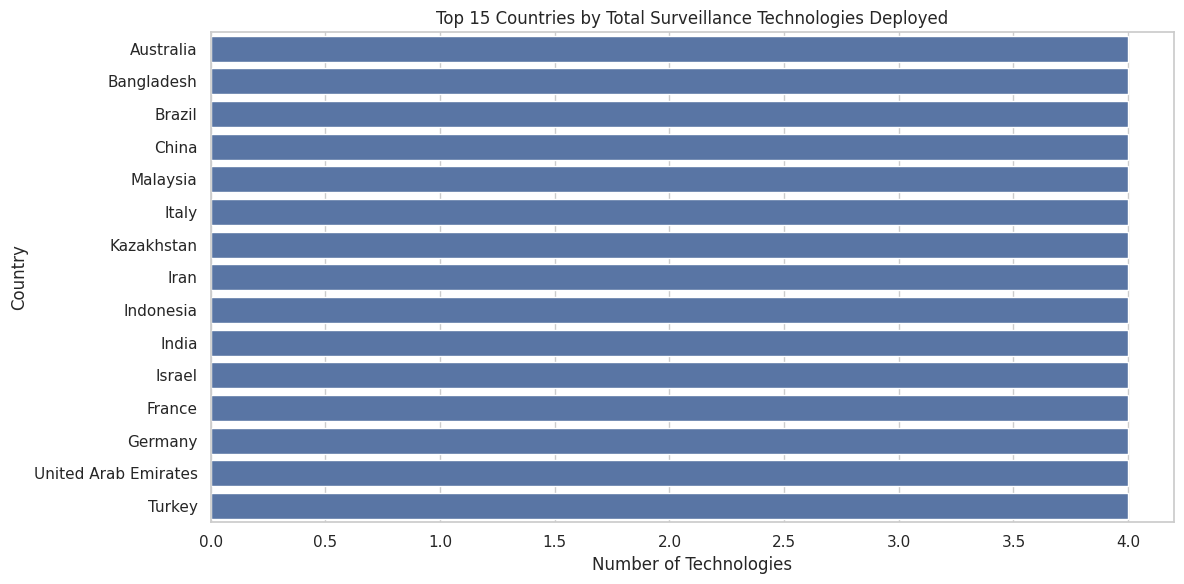

In [ ]:
# Module 6: Visualization – Technology Adoption
plt.figure(figsize=(12, 6))
top_countries = df_cleaned.sort_values('total_tech_deployed', ascending=False).head(15)
sns.barplot(x='total_tech_deployed', y='Country', data=top_countries)
plt.title("Top 15 Countries by Total Surveillance Technologies Deployed")
plt.xlabel("Number of Technologies")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


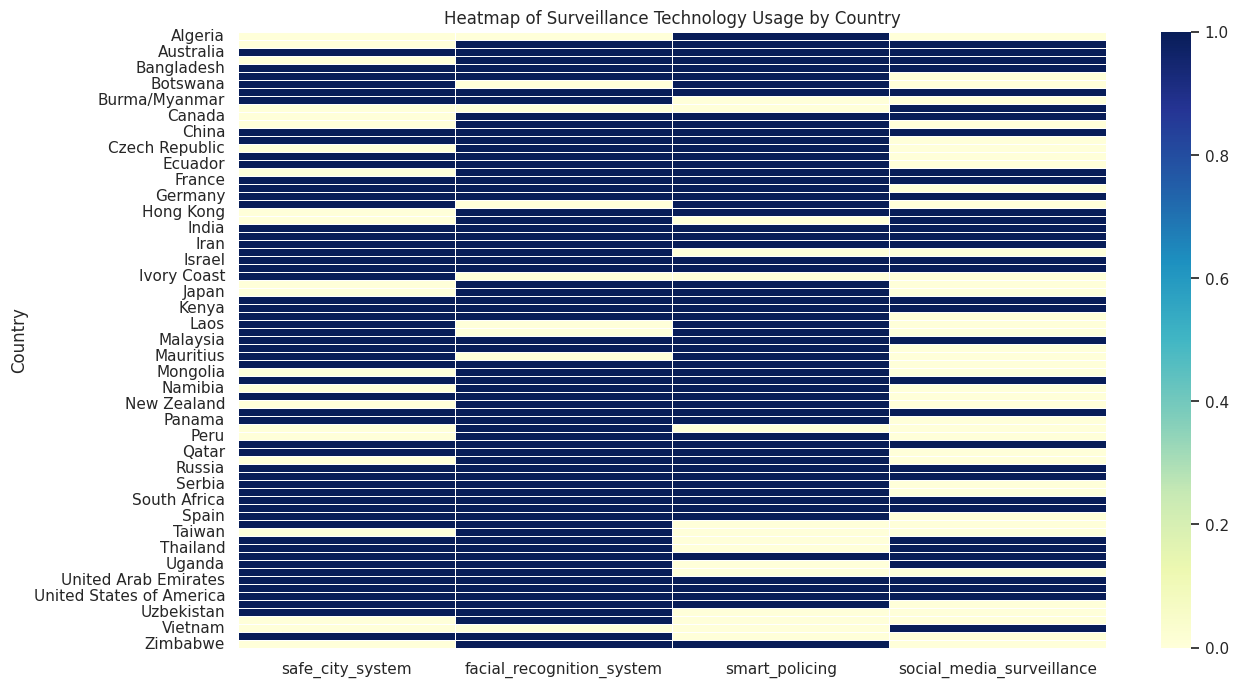

In [ ]:
# Module 7: Heatmap – Technology Usage Across Countries
plt.figure(figsize=(14, 8))
sns.heatmap(df_cleaned.set_index('Country')[tech_cols], cmap='YlGnBu', linewidths=0.5)
plt.title("Heatmap of Surveillance Technology Usage by Country")
plt.show()


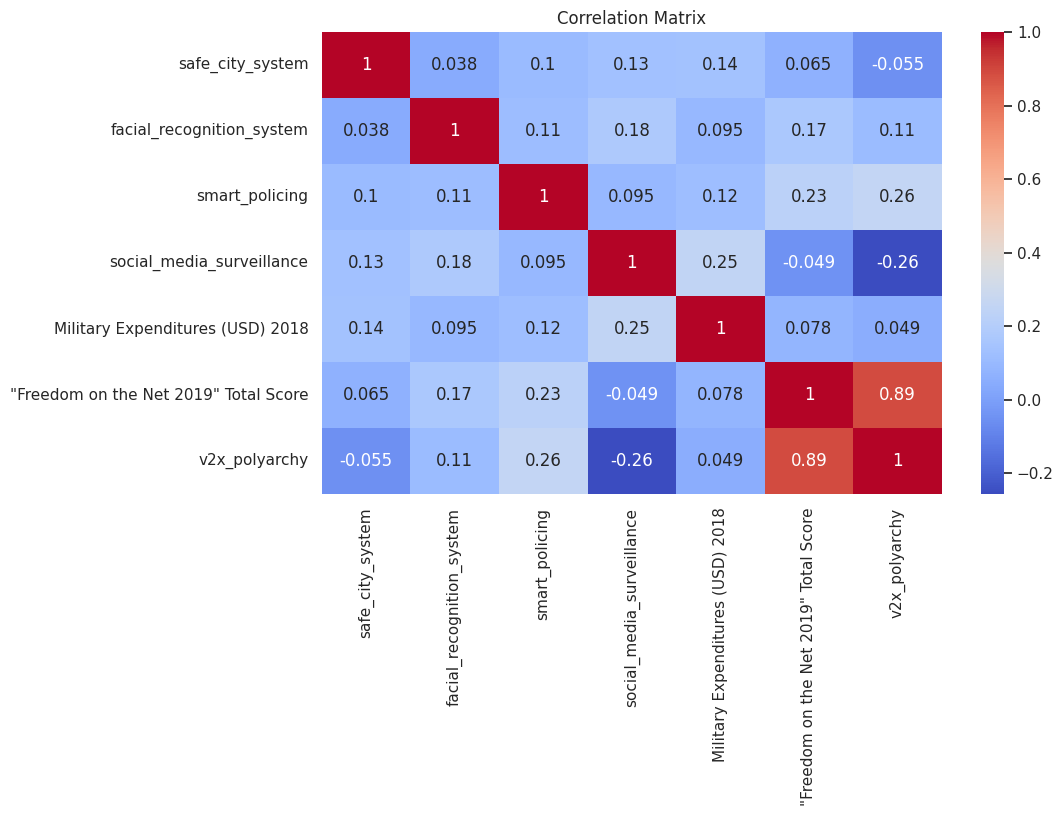

In [ ]:
# Module 8: Correlation Analysis (if predictors exist)
# Identify numeric predictors for modeling, modify this list if columns exist:
possible_predictors = [
    'Military Expenditures (USD) 2018',
    '"Freedom on the Net 2019" Total Score',
    'v2x_polyarchy'
]

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[tech_cols + possible_predictors].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Module 9: Predictive Modeling – Random Forest

# Target: whether a country uses facial recognition
df_model = df_cleaned.copy()
df_model['uses_facial_recognition'] = df_model['facial_recognition_system']

# Encode categorical variables if available
if 'Region' in df_model.columns:
    le = LabelEncoder()
    df_model['region_encoded'] = le.fit_transform(df_model['Region'])
    features = possible_predictors + ['region_encoded']
else:
    features = possible_predictors

# Drop rows with any missing predictor
df_model = df_model.dropna(subset=features)
X = df_model[features]
y = df_model['uses_facial_recognition']
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 0  2]
 [ 0 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      1.00      0.92        12

    accuracy                           0.86        14
   macro avg       0.43      0.50      0.46        14
weighted avg       0.73      0.86      0.79        14



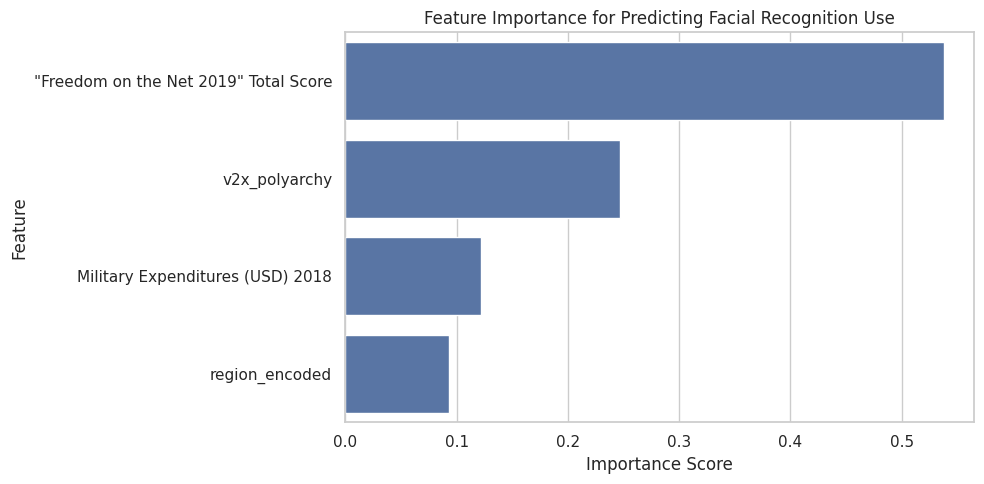

In [ ]:
# Module 10: Feature Importance
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance for Predicting Facial Recognition Use")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
# Module 11: Feature Engineering

# Add a feature: total surveillance technologies deployed
df_model['total_tech_deployed'] = df_model[tech_cols].sum(axis=1)

# Categorize surveillance intensity
def intensity_level(count):
    if count == 0:
        return 'None'
    elif count <= 2:
        return 'Low'
    elif count == 3:
        return 'Medium'
    else:
        return 'High'

df_model['surveillance_intensity'] = df_model['total_tech_deployed'].apply(intensity_level)

# Encode categorical intensity
df_model['intensity_encoded'] = LabelEncoder().fit_transform(df_model['surveillance_intensity'])

# Add boolean: advanced_tech_user (uses both safe city and facial recognition)
df_model['advanced_tech_user'] = ((df_model['safe_city_system'] == 1) &
                                  (df_model['facial_recognition_system'] == 1)).astype(int)

# Final feature set
engineered_features = features + ['total_tech_deployed', 'intensity_encoded', 'advanced_tech_user']


In [ ]:
# Module 12: Train/Test Split
X = df_model[engineered_features]
y = df_model['uses_facial_recognition']

# Ensure no missing values
X = X.fillna(0)

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# Module 13: Multiple Model Comparison
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds)
    }

results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.857143,0.857143,1.0,0.923077
Decision Tree,0.928571,0.923077,1.0,0.960000
Random Forest,0.857143,0.857143,1.0,0.923077


In [ ]:
# Module 14: Hyperparameter Tuning – Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                           cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
best_preds = best_rf.predict(X_test)
print(classification_report(y_test, best_preds))


Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      1.00      0.92        12

    accuracy                           0.86        14
   macro avg       0.43      0.50      0.46        14
weighted avg       0.73      0.86      0.79        14



In [ ]:
# Module 14: Hyperparameter Tuning – Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                           cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
best_preds = best_rf.predict(X_test)
print(classification_report(y_test, best_preds))


Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      1.00      0.92        12

    accuracy                           0.86        14
   macro avg       0.43      0.50      0.46        14
weighted avg       0.73      0.86      0.79        14

